### surface energy
$$\gamma = \frac{E_{slab}- n*E_{atom}}{A_{total}}$$

In [14]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt
import ase.units

In [15]:
potential =  'FeH-NNIP'

In [16]:
pr = Project('Surface')

In [17]:
def cal_area(structure):
    structure = structure
    V = structure.get_volume()
    c = structure.get_cell()[-1][-1]
    return V/c

In [18]:
Gamma = []

In [19]:
# calculat E_atom
job_bulk = pr.create.job.Lammps('Bulk', delete_existing_job=True)
bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True)
job_bulk.structure = bulk
job_bulk.potential = potential
job_bulk.calc_minimize(pressure=0.0)
job_bulk.run(delete_existing_job=True)
eFe = job_bulk.output.energy_tot[-1]/len(bulk)
sc = job_bulk.get_structure(-1).repeat([4,4,4])

The job Bulk was saved and received the ID: 10180


In [20]:
# 001 surface
slab001 = pr.create.structure.surface_hkl(sc, hkl=[0,0,1],
                        layers=3, vacuum=20, center=True)
# slab001.plot3d()

job1 = pr.create.job.Lammps('s001', delete_existing_job=True)
job1.structure = slab001
job1.potential = potential
job1.calc_minimize()
job1.run(delete_existing_job=True)
E001 = job1.output.energy_tot[-1]
# A= job1.get_structure(-1).get_volume()/job1.get_structures(-1).get_cell()[-1]
A= cal_area(job1.get_structure(-1))
gamma001 = (E001-len(slab001)*eFe)/(2*A)
Gamma.append(gamma001)

The job s001 was saved and received the ID: 10181


In [21]:
# 110
slab110 = pr.create.structure.surface_hkl(sc, hkl=[1,1,0],
                        layers=3, vacuum=20, center=True)
# slab110.plot3d()

job2 = pr.create.job.Lammps('s110', delete_existing_job=True)
job2.structure = slab110
job2.potential = potential
job2.calc_minimize()
job2.run(delete_existing_job=True)
E110 = job2.output.energy_tot[-1]
A= cal_area(job2.get_structure(-1))
gamma110 = (E110-len(slab110)*eFe)/(2*A)
Gamma.append(gamma110)

The job s110 was saved and received the ID: 10182


In [22]:
# 111
slab111 = pr.create.structure.surface_hkl(sc, hkl=[1,1,1],
                        layers=3, vacuum=20, center=True)
# slab111.plot3d()

job3 = pr.create.job.Lammps('s111', delete_existing_job=True)
job3.structure = slab111
job3.potential = potential
job3.calc_minimize()
job3.run(delete_existing_job=True)
E111 = job3.output.energy_tot[-1]
A= cal_area(job3.get_structure(-1))
gamma111 = (E111-len(slab111)*eFe)/(2*A)
Gamma.append(gamma111)

The job s111 was saved and received the ID: 10183


In [23]:
# 112
slab112 = pr.create.structure.surface_hkl(sc, hkl=[1,1,2],
                        layers=3, vacuum=20, center=True)
# slab112.plot3d()

job4 = pr.create.job.Lammps('s112', delete_existing_job=True)
job4.structure = slab112
job4.potential = potential
job4.calc_minimize()
job4.run(delete_existing_job=True)
E112 = job4.output.energy_tot[-1]
A= cal_area(job4.get_structure(-1))
gamma112 = (E112-len(slab112)*eFe)/(2*A)
Gamma.append(gamma112)

The job s112 was saved and received the ID: 10184


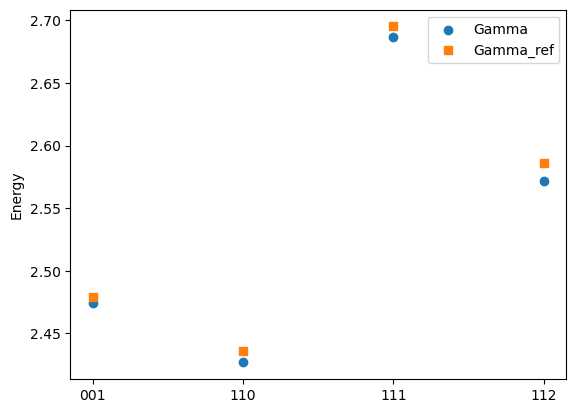

In [24]:
Gamma_ref = [2.479, 2.436, 2.695, 2.586]

Gamma1 = [x /ase.units.J * (ase.units.m)**2 for x in Gamma]

x_values = ['001', '110', '111', '112']

plt.scatter(x_values, Gamma1, label='Gamma', marker='o')
plt.scatter(x_values, Gamma_ref, label='Gamma_ref', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()